## First step to clean the dataset:

- Select only English movies
- Select onlu full-length feature (movies of more than one hour long)
- Remove movies for which we don't have the title

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import string
import json

In [3]:
character_metadata = pd.read_csv('Data/character.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_release_date',
                                                                              'Character_name',
                                                                              'Actor_date_of_birth',
                                                                              'Actor_gender',
                                                                              'Actor_height',
                                                                              'Actor_ethnicity',
                                                                              'Actor_name',
                                                                              'Actor_age_at_movie_release',
                                                                              'Freebase_character/actor_map_ID',
                                                                              'Freebase_character_ID',
                                                                              'Freebase_actor_ID'])

movie_metadata = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'Freebase_movie_ID',
                                                                              'Movie_name',
                                                                              'Movie_release_date',
                                                                              'Movie_box_office_revenue',
                                                                              'Movie_runtime',
                                                                              'Movie_languages',
                                                                              'Movie_countries',
                                                                              'Movie_genres'])

plot_summaries = pd.read_csv('Data/plot_summaries.txt', sep='\t', names = ['Wikipedia_movie_ID',
                                                                              'summary'])

In [4]:
#Copy of movie_metadata dataset
movie_metadata_readable = movie_metadata.copy(deep= True)

# Make the colomn Movie_languages, Movie_countries and Movie_genres more readable

def readable(colomn):

    pd.set_option('mode.chained_assignment', None) #remove warning

    for i in colomn.index:
        d=json.loads(colomn[i]) #change set of each row from the colomn to dict
        colomn[i]=list(d.values()) #change the dict into list

readable(movie_metadata_readable['Movie_languages'])
readable(movie_metadata_readable['Movie_countries'])
readable(movie_metadata_readable['Movie_genres'])

movie_metadata_readable.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [165]:
#Filtering of movie_metada, keeping only full-length features movies (more than 60 minutes long and that have a Title in the database.
movie_metadata_filtered = movie_metadata_readable.copy(deep=True)

#movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issubset)]

movie_metadata_filtered.dropna(subset=['Movie_name'],inplace=True)

movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_runtime >= 60]

movie_metadata_filtered.dropna(subset=['Movie_release_date'], inplace = True)
movie_metadata_filtered["Movie_release_date"] = movie_metadata_filtered['Movie_release_date'].apply(lambda x : str(x)[:4]).apply(lambda x : int(x))

movie_metadata_filtered.size

470574

# Language filtering
Because we want to do NLP analysis of the title, we want to filter the dataset to keep mainy english movies, as the NLP packages are mostly developed for english

/Users/emiliemonnet/anaconda3/envs/ada/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66582 (\N{DESERET CAPITAL LETTER JEE}) missing from current font.
  func(*args, **kwargs)
/Users/emiliemonnet/anaconda3/envs/ada/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66610 (\N{DESERET SMALL LETTER SHORT O}) missing from current font.
  func(*args, **kwargs)
/Users/emiliemonnet/anaconda3/envs/ada/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66633 (\N{DESERET SMALL LETTER ER}) missing from current font.
  func(*args, **kwargs)
/Users/emiliemonnet/anaconda3/envs/ada/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66635 (\N{DESERET SMALL LETTER EM}) missing from current font.
  func(*args, **kwargs)
/Users/emiliemonnet/anaconda3/envs/ada/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 66636 (\N{DESERET SMALL LETTER EN}) missing from current font.
  func(*args, **

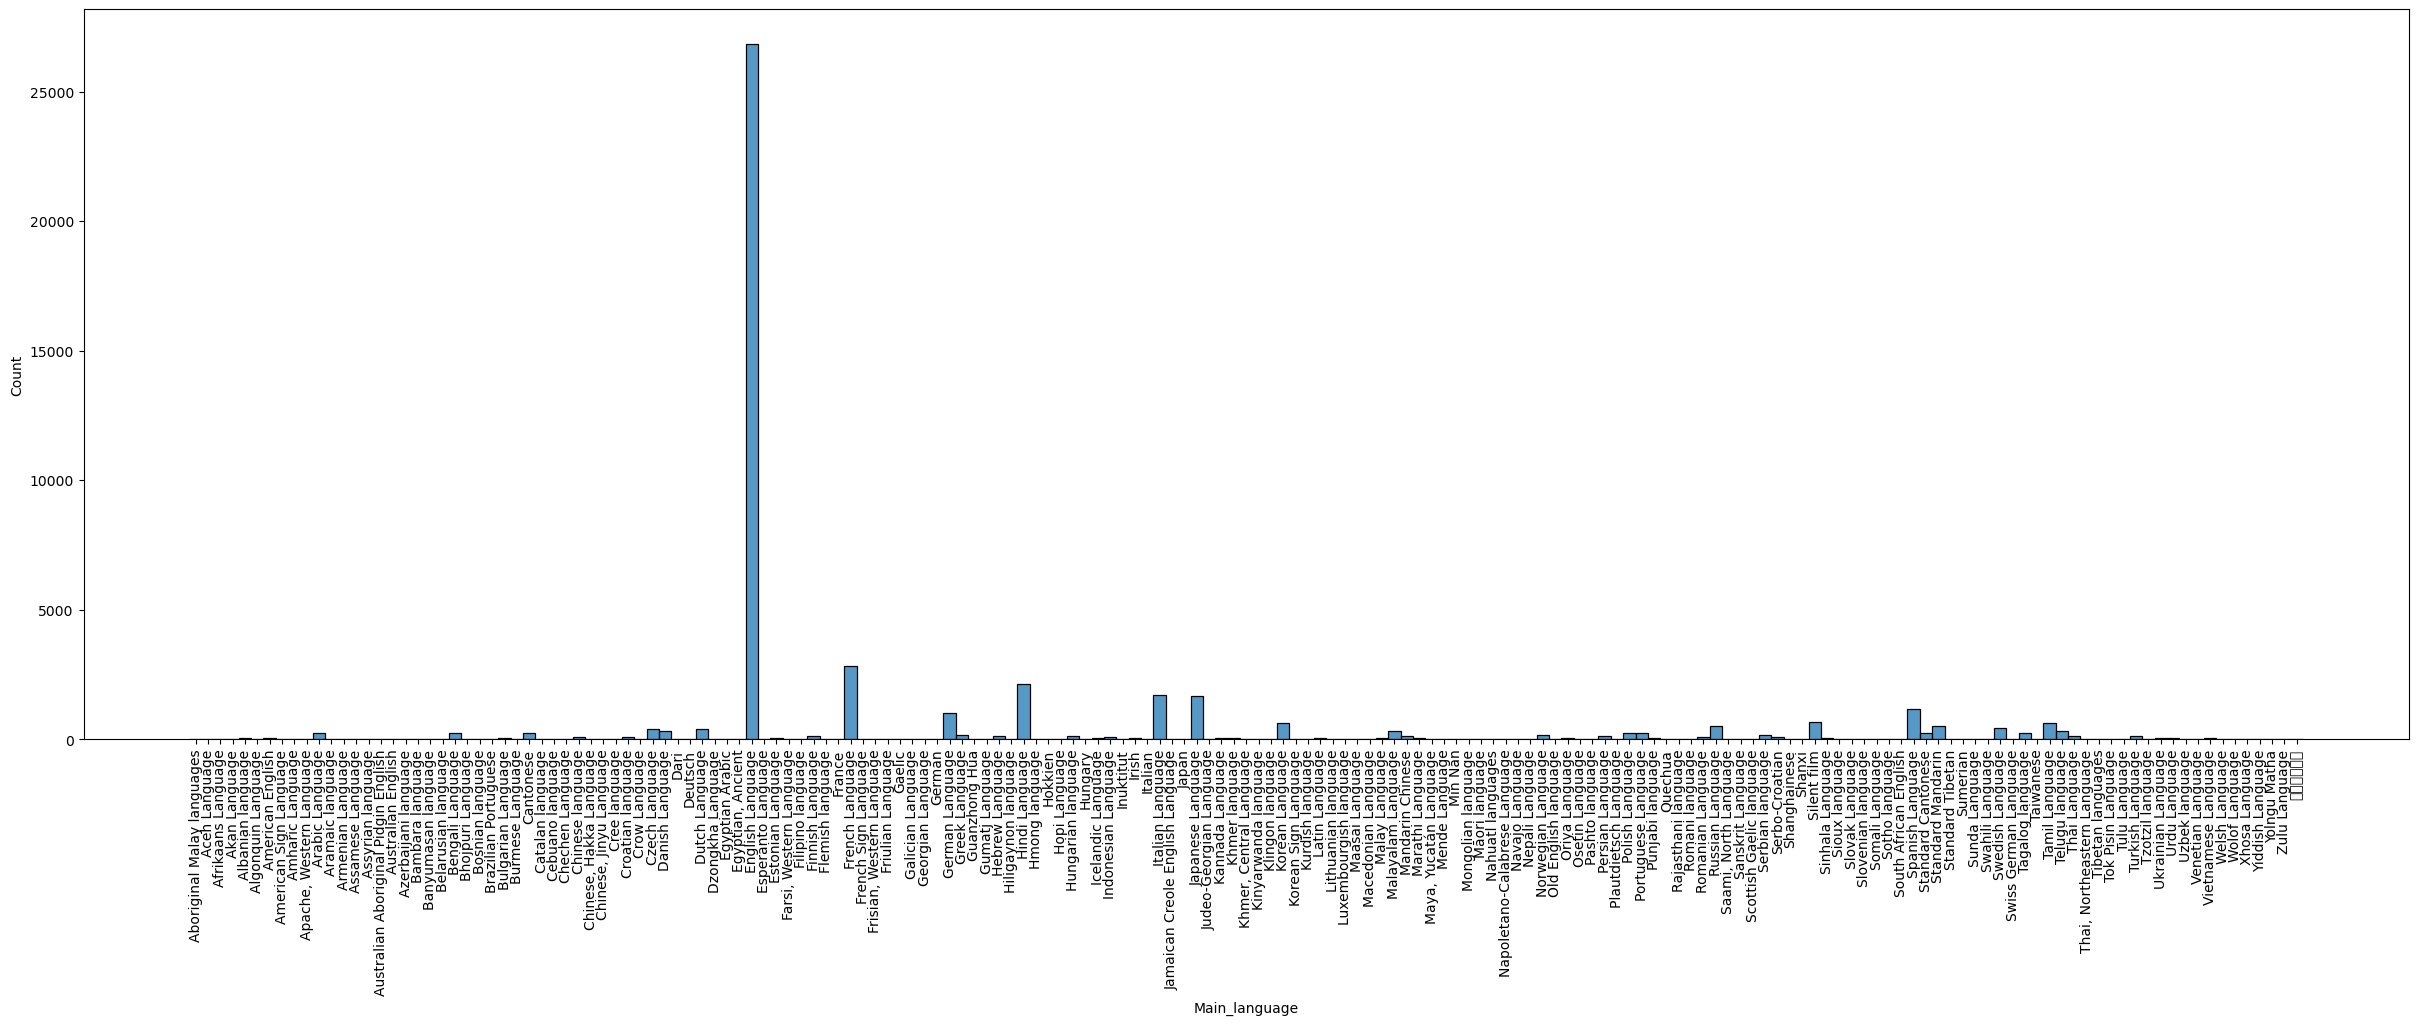

In [164]:
#Movie distribution per languages

movie_metadata_filtered['Main_language'] = movie_metadata_filtered.Movie_languages.str[0]
movie_metadata_filtered['Main_language'] = movie_metadata_filtered.Main_language.astype('category')

plt.figure(figsize=(30,10))
plt.rc('axes', unicode_minus=False)
ax = sns.histplot(movie_metadata_filtered,x='Main_language',stat='count')
#ax.set_xticklabels(rotation=90,labels = movie_metadata_filtered['Main_language'].cat.categories)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.15)

#C'est dégueu et j'arrive pas à rendre ça propre...
##Les mesages d'erreur c'est parce qu'il arrive pas à afficher les caracttères non latin, j'ai essayé de m'en débarasser mais j'ai pas réussi

#The most used language is the english. It should not be a problem to only keep movies with english as main language.

In [166]:
#Keep movies with english in all the language

movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issubset)]

In [ ]:
#Create dataset woth filtered language: english language only or english as first language

movie_English_first = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.str[0]=="English Language"] #English Language as First Language

movie_English_only = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issuperset)] #Only English Language

# Temporal distribution

Why is it releavant?

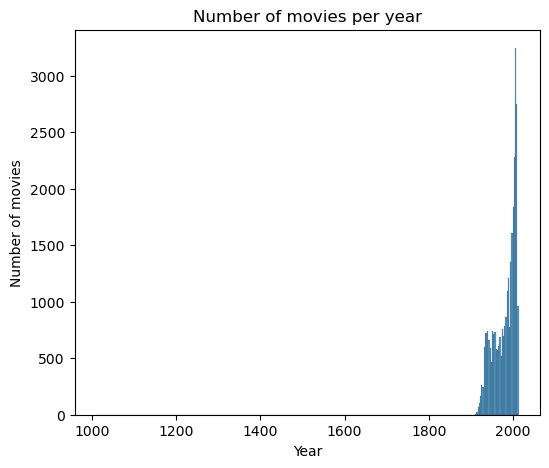

In [167]:
#Number of movies per year
plt.figure(figsize=(6,5))
ax = sns.histplot(movie_metadata_filtered,x='Movie_release_date',stat='count').set(title="Number of movies per year",xlabel="Year",ylabel="Number of movies")

In [168]:
#Very weird, how could a movie be released before 1895, when the first movie of all time was released?
#Dig into the data
movie_metadata_filtered[movie_metadata_filtered['Movie_release_date']<1895]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
62836,29666067,/m/0fphzrf,Hunting Season,1010,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]"


In [169]:
#Only one movie. When we search for it on wikipedia, it appears that it is a false date (obviously). The real release year is 2010. Let's change it.

movie_metadata_filtered['Movie_release_date'][62836]=2010

#Our dataset was extracted in 2012. Therefore we remove the movie with a release date after 2012

movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered.Movie_release_date <= 2012]

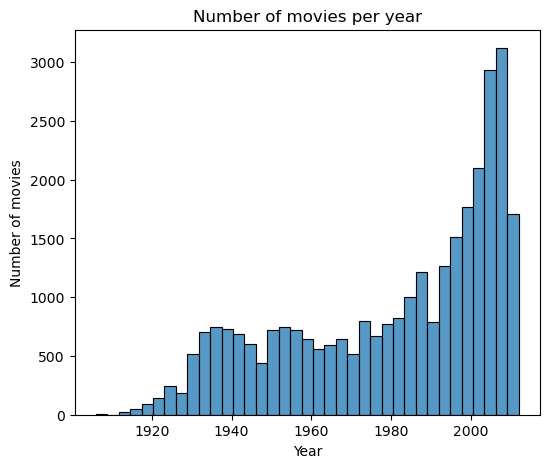

In [170]:
plt.figure(figsize=(6,5))
ax = sns.histplot(movie_metadata_filtered,x='Movie_release_date',stat='count').set(title="Number of movies per year",xlabel="Year",ylabel="Number of movies")

# WAOUH

# Movie distribution per country 
Why is it relevant?

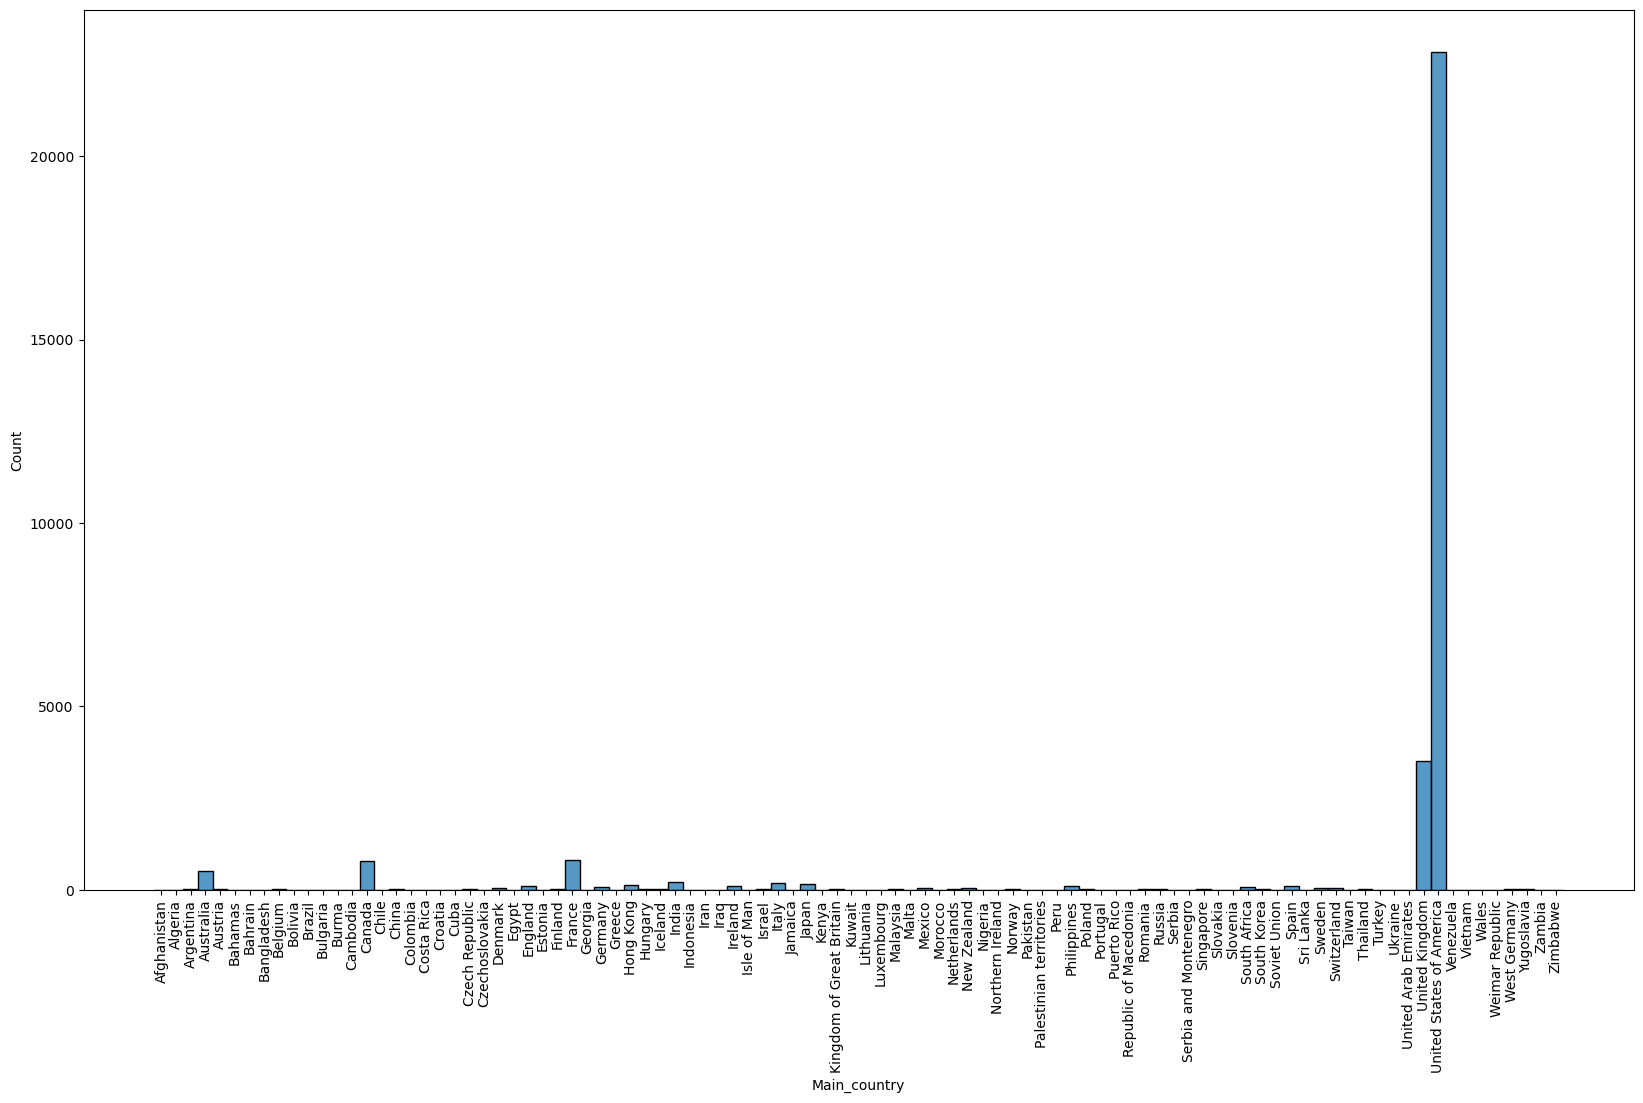

In [131]:
#Movie distribution per country of production (after filtering) 
movie_metadata_filtered['Main_country'] = movie_metadata_filtered.Movie_countries.str[0]
movie_metadata_filtered['Main_country'] = movie_metadata_filtered.Main_country.astype('category')

plt.figure(figsize=(20,10))
ax = sns.histplot(movie_metadata_filtered,x='Main_country',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.0)

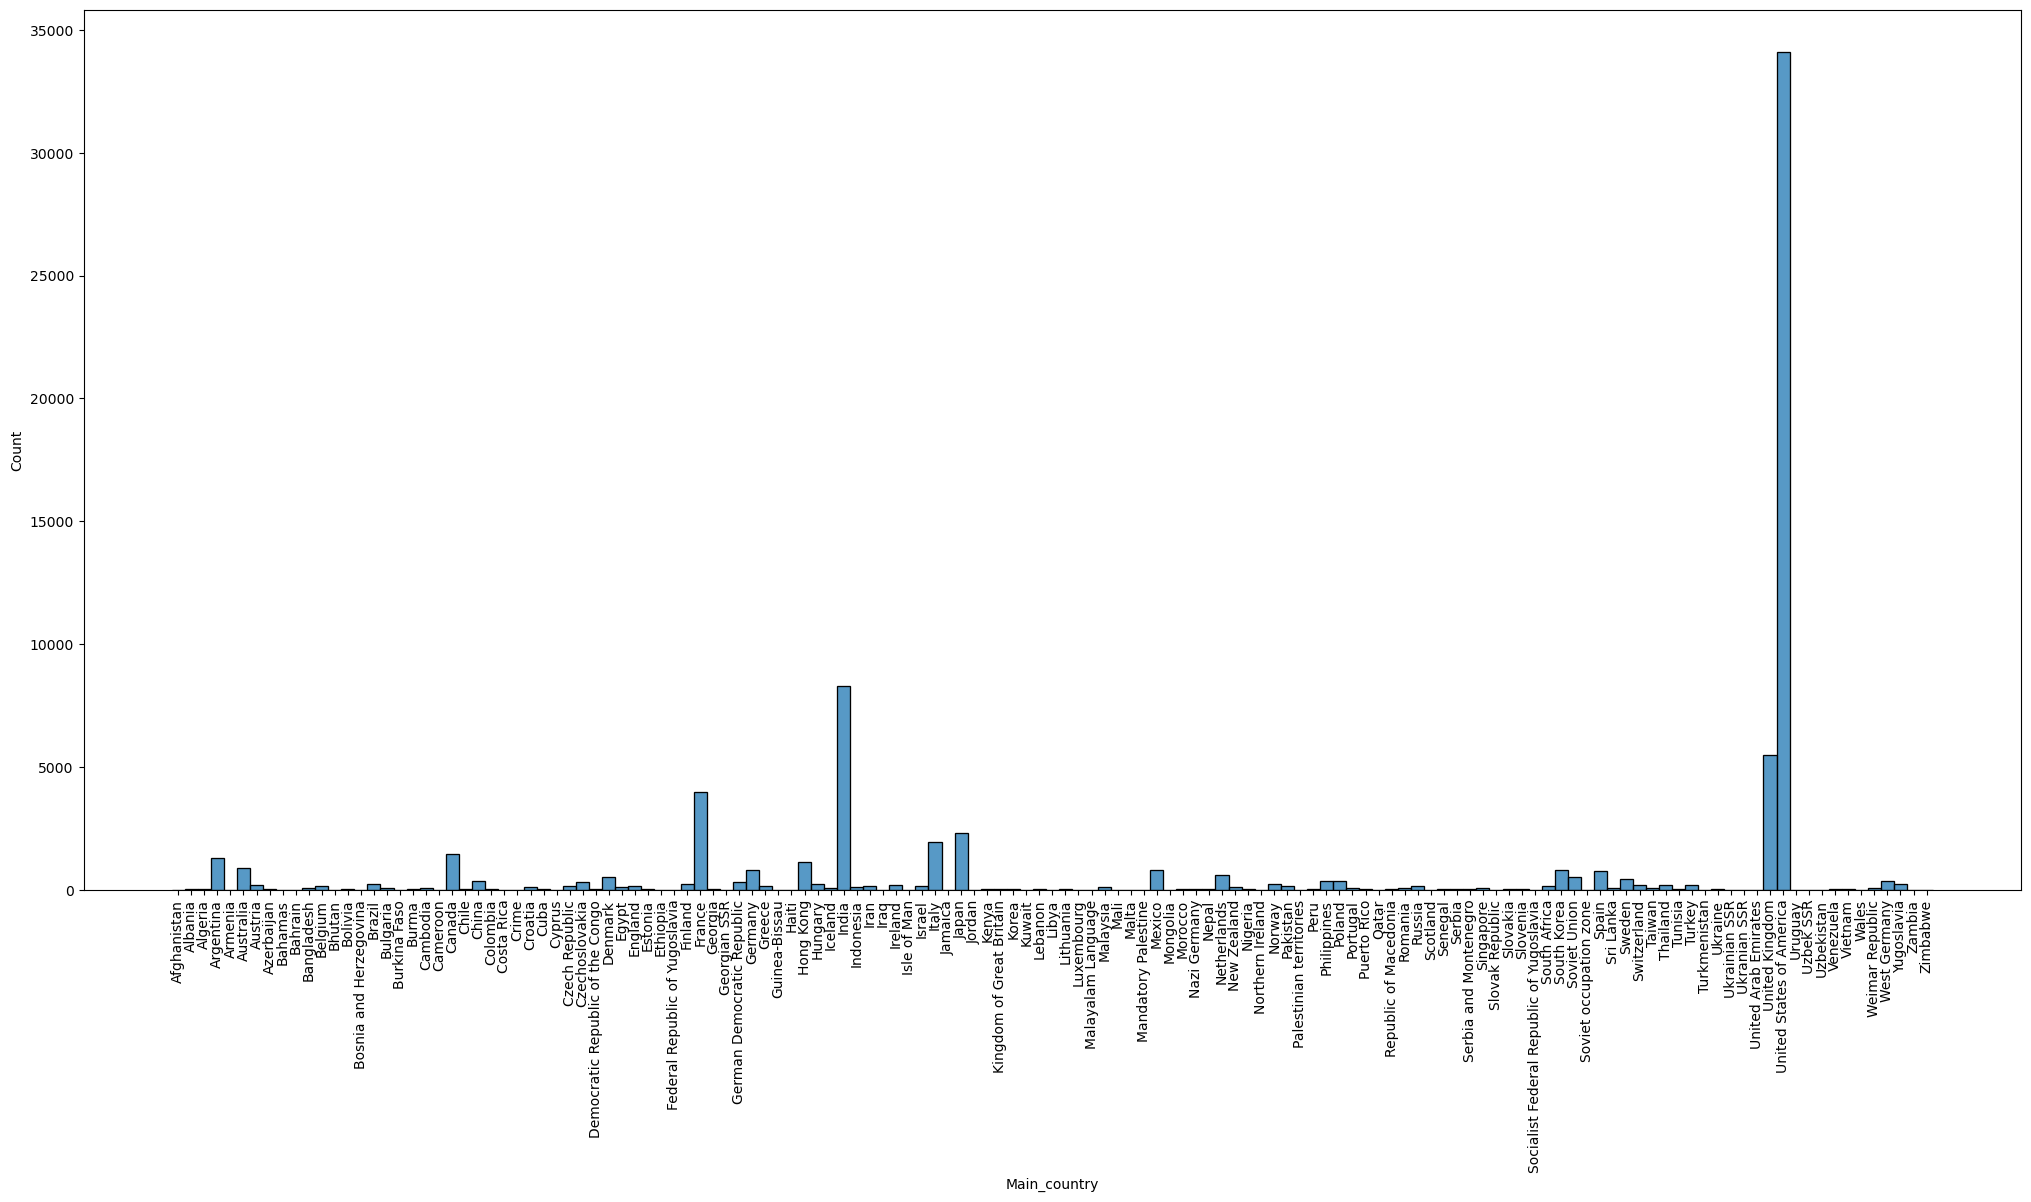

In [132]:
#Movie distribution per country of production (before filtering)
movie_metadata_filtered_language_unfiltered['Main_country'] = movie_metadata_filtered_language_unfiltered.Movie_countries.str[0]
movie_metadata_filtered_language_unfiltered['Main_country'] = movie_metadata_filtered_language_unfiltered.Main_country.astype('category')

plt.figure(figsize=(25,10))
ax = sns.histplot(movie_metadata_filtered_language_unfiltered,x='Main_country',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0.0)

# Select english only:before or after year analysis?

In [172]:
#Create dataset with filtered language: english language only or english as first language

movie_English_first = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.str[0]=="English Language"] #English Language as First Language

movie_English_only = movie_metadata_filtered[movie_metadata_filtered.Movie_languages.map(set(['English Language']).issuperset)] #Only English Language

In [173]:
movie_English_only.to_csv(path_or_buf = "Data/movies_metadata_english_only.csv", sep=',')

# Merging of IMBD and Rottent tomatoes files --> Success analysis

In [134]:
# IMDB files 

ratings_imdb = pd.read_table('Data/ratings_imdb.tsv', sep="\t")
ratings_imdb.head()


movies_imdb= pd.read_table('Data/movies_imdb.tsv', sep="\t")



In [135]:
# Rotten tomatoes 

rotten_tomatoes = pd.read_table('Data/movies_rottentomatoes.csv', sep=",")
rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


# Genre processing

In [174]:
# Genre processing: give only one genre to our films, preferably the main genre (first on the list), from a "basic" dictionnary of genre


# 1st step: create a new genre dictionnary
dict_genre = {
    "Action": ["Action/adventure", "ninja movie", "epic", "auto racing", "martial arts film","Combat Films", "race movie", "samurai cinema", "Super hero", "superhero movie", "superhero","Outlaw biker film"],
    "Adventure": ["Adventure", "travel"],
    "Art": ["Art film","Concert film", "Film-Opera", "Operetta", "Punk rock", "Rockumentary", "Space opera", "Singing cowboy", "Hip hop movies", "Breakdance", "Dance", "musical", "& Literature", "Literature", "Music","Experimental film"],
    "Comedy": ["Humour", "Tragicomedy", "Ealing Comedies", "Comedy film","Comedy", "Adventure Comedy", "Comedy of manners", "Workplace comedy", "comedy-drama", "Buddy Picture", "Buddy cop", "Parody","Black comedy","Satire","Screwball comedy","Musical comedy","Buddy film","Mockumentary"], 
    "Documentary": ["Political Documentary", "Docudrama", "Historical Documentaries", "Rockumentary", "media studies", "media satire", "Political cinema", "Political Documentary"],
    "Drama": ["Melodrama", "Tragedy", "Tragicomedy", "Docudrama", "Family drama", "Comedy-drama", 'illnesses & disabilities','Costume drama',"Political drama","Exploitation"], 
    "Engaged":["LGBT","Blaxploitation","Christian film","Culture & Society","Religious Film"],
    "Family": ["Computer Animation","Coming of age","Family Film", "Animation", "Animated cartoon", "Children's film", "children's", "children's entertainment", "children's fantasy", "children's/family", "For children","Christmas movie","Television movie","Teen"], 
    "Fiction": ["Science Fiction","fairy tail", "fictional film", "medical fiction", "mythological fantasy", "sci fi pictures", 'sci fi pictures original films', "sword and sorcery films", "sword and sandal", "time travel", "supernatural", "Alien invasion","Alien Film", "Zombie film", "Z-movie", "z movie", "Zombie","Fantasy","Disaster","Fan film"],
    "Historical": ["Short Film","Historical fiction","Period piece","history", "Biographical", "British History", "British Empire Film", "British new wave", "Historical Epic", "Cold War", "Historical Documentaries", "Biography", "Biopic [feature]", "The Netherlands in World War II", "Gulf War", "movies about gladiators","Biographical film","Historical drama","Sponsored film"],
    "Horror": ["Natural Horror film", "Sci-fi Horror", "road-horror", "Creature Movie", "Monster Movie", "Creature","Slasher"],
    "Old movie":['Black-and-white',"Silent film"],
    "Porn": ["Pornographic movie", "Pornography", "Softcore Porn", "Adult", "Sexploitation", "Erotica", "homoeroticism", "erotic thriller", "Hardcore pornography", "Homoeroticism","Gay pornography"], 
    "Romance": ["Romance film", "romantic fantasy","Romantic comedy","Romantic drama","Pre-code"],
    "Sport": ["baseball", "boxing", "sports"],
    "Thriller": [ "film à clef", "mystery", "suspense", 'crime', 'crime fiction', 'crime thriller', "master criminal films", "detective", "Master Criminal Films", "Heist", "Gangster Film","Film noir","Psychological thriller","Detective fiction","Spy"],
    "Western": ["Singing cowboy", "Westerns", "B-Western", "Epic Western", "Spaghetti Western"],
    "World cinema": ["Northern","Chinese Movies", "Japanese Movies", "Latino", "americana", "bengali cinema", "filipino movies", "Anime", "Indie"],
    "War film": ["war", "War effort", "anti-war", "anti-war film", "nuclear warfare", "foreign legion"],

}

In [175]:
# 2nd step: Revert the current dictionnary, easier to manipulate  À GARDER?

dict_genre_revert = {}
for key, value in dict_genre.items():
    key = key.lower() #passage en minuscule
    for v in value:
        v = v.lower()
        dict_genre_revert[v] = key
    dict_genre_revert[key] = key

In [176]:
# 3rd step:-regarder le 1er genre de la liste original, si dans clef du dict reverse, attribuer le nouveau genre correspondant
#          -si 1er genre pas dans clef, passer au 2ème genre de la liste (et faire la même chose)
#          -si aucun genre ne correspond, print la ligne

movie_EF_main_genre = movie_English_first.copy(deep=True)

movie_EF_main_genre['Movie_main_genre']=0

In [177]:
#drop movie without genre (=liste vide dans genre)
movie_EF_main_genre=movie_EF_main_genre[movie_EF_main_genre['Movie_genres'].map(lambda d: len(d)) > 0]

In [178]:
for i in movie_EF_main_genre.index:
    N=len(movie_EF_main_genre['Movie_genres'][i])
    k=0
    while k < N:
        genre = movie_EF_main_genre['Movie_genres'][i][k].lower()
        if genre in dict_genre_revert.keys():
            genre=dict_genre_revert.get(genre)
            movie_EF_main_genre['Movie_main_genre'][i]= str(genre)
            k=N+1
        else:
            k+=1

#Fin du classement à la main: soit évident, soit en fonction des films (par exemple, genre exploitation, genre pre-code,...)

movie_EF_main_genre.to_csv(path_or_buf = "Data/movies_metadata_EF_main_genre.csv", sep=',')

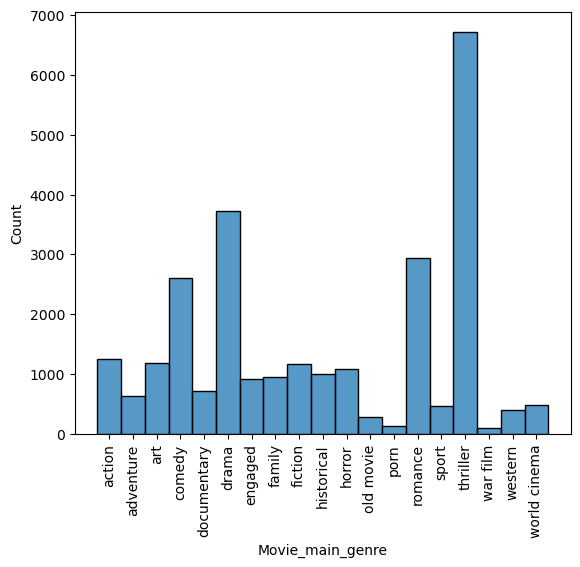

In [141]:
movie_EF_main_genre['Movie_main_genre'] = movie_EF_main_genre.Movie_main_genre.astype('category')

ax = sns.histplot(movie_EF_main_genre,x='Movie_main_genre',stat='count')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gcf().subplots_adjust(bottom=0)


# Preprocess character metadata before to merge it with movies

In [180]:
# Ajouter les noms des personnages principaux au movie.metadata
movie_English_only_copy = movie_English_only.copy(deep= True)
character_metadata_copy = character_metadata.copy(deep= True)

character_metadata_copy.dropna(subset=['Character_name'], inplace=True)
#il reste encore des NaN !!!!

movie_character = movie_English_only_copy.merge(character_metadata_copy, how='inner',left_on='Wikipedia_movie_ID', right_on='Wikipedia_movie_ID')

movie_character = movie_character[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date_x',  'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres', 'Character_name', 'Freebase_character_ID']]
# je sais pas pourquoi mais il veut pas mettre le wikipedia movie ID et la release date

grouped_movie_character = movie_character.groupby('Wikipedia_movie_ID').agg({
    'Movie_name': 'first',  
    'Movie_box_office_revenue': 'first', 
    'Movie_runtime': 'first', 
    'Movie_languages': 'first', 
    'Movie_countries': 'first',  
    'Movie_genres': 'first',  
    'Character_name': lambda x: ', '.join(x.dropna()),  
    'Freebase_character_ID':  lambda x: ', '.join(x.dropna())
}).reset_index()
grouped_movie_character.sample(5).head()

,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Character_name,Freebase_character_ID
2210,1266489,The Pagemaster,13670688.0,88.0,[English Language],[United States of America],"[Adventure, Children's/Family, Animation, Chil...","Fantasy, Dr. Jekyll, Adventure, Claire Tyler, ...","/m/0h5qwl8, /m/0h16df2, /m/0gyhvvr, /m/0h5qwjx..."
8537,8964739,Just Around the Corner,NaN,70.0,[English Language],[United States of America],"[Family Drama, Black-and-white, Musical, Drama...",Penny Hale,/m/0gy76yh
5958,4606109,I Bury the Living,NaN,77.0,[English Language],[United States of America],"[Gothic Film, Horror]",Robert Kraft,/m/0h4z9cl
9806,12124469,The Strange Door,NaN,81.0,[English Language],[United States of America],"[Horror, Psychological thriller, Black-and-white]",Wedding Guest,/m/0h2xwgn
1034,473260,The Business of Strangers,1028337.0,85.0,[English Language],[United States of America],"[Thriller, Drama, Psychological thriller, Indie]","Nick Harris, Receptionist, Mr. Fostwick, Rober...","/m/0b_wkd0, /m/0b_wkc3, /m/0b_wkcf, /m/0b_wkbc..."


In [181]:
# check if one of the character's name is present in the movie title

movie_character['Character_in_title'] = movie_character.apply(lambda row: str(row['Character_name']).lower() in str(row['Movie_name']).lower(), axis=1)
movie_with_character_in_title = movie_character['Character_in_title'].sum()

print(f"Fraction of movie titles containing character name: {movie_with_character_in_title / len(grouped_movie_character):.2%}")
print(movie_character.loc[movie_character['Character_in_title'] == 1, ['Movie_name', 'Character_name']])

Fraction of movie titles containing character name: 8.25%
                                    Movie_name   Character_name
26                                     Henry V          Henry V
35                                Mary Poppins     Mary Poppins
188                ChromeSkull: Laid to Rest 2      ChromeSkull
255                     Good Morning Miss Dove        Miss Dove
374                                  RoboCop 3          RoboCop
...                                        ...              ...
98329                             Stingray Sam     Stingray Sam
98662                                    Emile            Emile
98715                            Grandma's Boy    Grandma's Boy
99119  Sherlock Holmes and the Voice of Terror  Voice of Terror
99128  Sherlock Holmes and the Voice of Terror  Sherlock Holmes

[1305 rows x 2 columns]


In [182]:
# certains noms de personnages ne sont pas vraiment des prénoms, est-ce qu'il faudra faire de la NLP?
